In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Here is the example in [seaborn](https://seaborn.pydata.org/introduction.html) documentation. [`sns.set()`](https://seaborn.pydata.org/generated/seaborn.set.html#seaborn.set)用来设置整体的风格，字体，颜色等。`sns.set_style()`调整`seaborn`的风格，有5中预设的风格： `darkgrid (default), whitegrid, dark, white,` and `ticks`。

In [2]:
sns.set()  # reset
sns.set_style('whitegrid')

[`color palettes`](https://seaborn.pydata.org/tutorial/color_palettes.html) shows how to adjust the color palette. There are six variations of the default theme, called `deep, muted, pastel, bright, dark,` and `colorblind`.

In [3]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


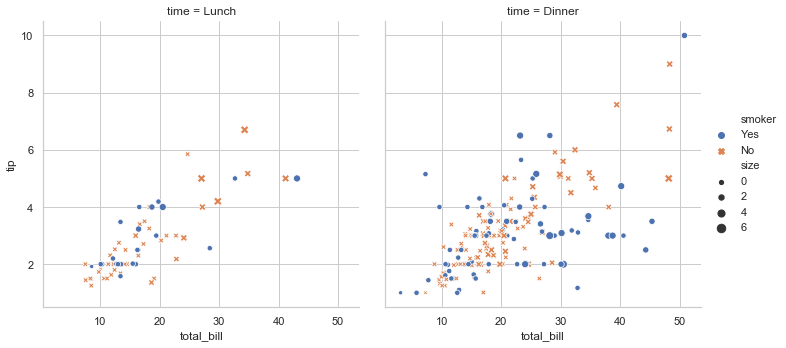

In [4]:
sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",
            data=tips)

A few things to note about `seaborn` figures:

1. `seaborn` return a `matplotlib.axes` object, so we can use all `axes` methods to make modifications, e.g. `set_title`, `set_

## 1. relplot

`relplot`用来可视化数据之间的关系。`relplot`可以理解为`lineplot`和`scatterplot`的结合，可以通过`kind`参数来调整显示 `line` 还是 `scatter`。默认是散点图。

```
seaborn.relplot(x=None, y=None, hue=None, size=None, style=None, data=None, row=None, col=None, col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, style_order=None, legend='brief', kind='scatter', height=5, aspect=1, facet_kws=None, **kwargs)
```

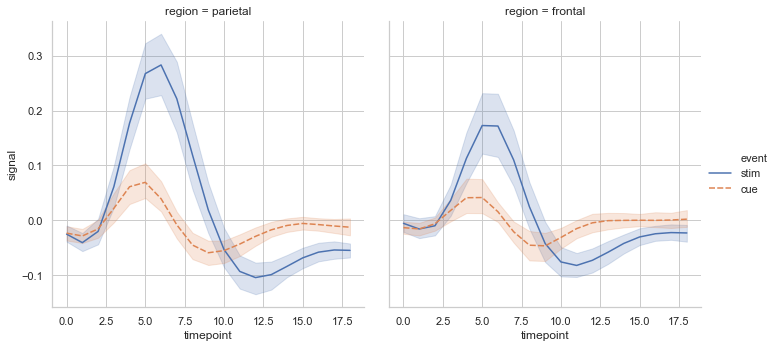

In [5]:
fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", col="region",
            hue="event", style="event",
            kind="line", data=fmri);

## 2. heatmap

`heatmap` is a matrix plot.

```
seaborn.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
```

In [6]:
data=sns.load_dataset("flights").pivot("month","year","passengers") 
data.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


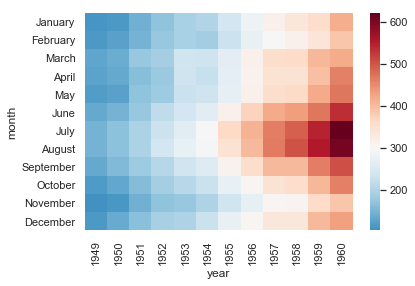

In [7]:
sns.heatmap(data=data, cmap="RdBu_r", center=300, annot=False)

## 3. pairplot

`pairplot` 主要展现的是变量两两之间的关系（线性或非线性，有无较为明显的相关关系)。

```
seaborn.pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
```

In [8]:
# load iris data 鸢尾花数据
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


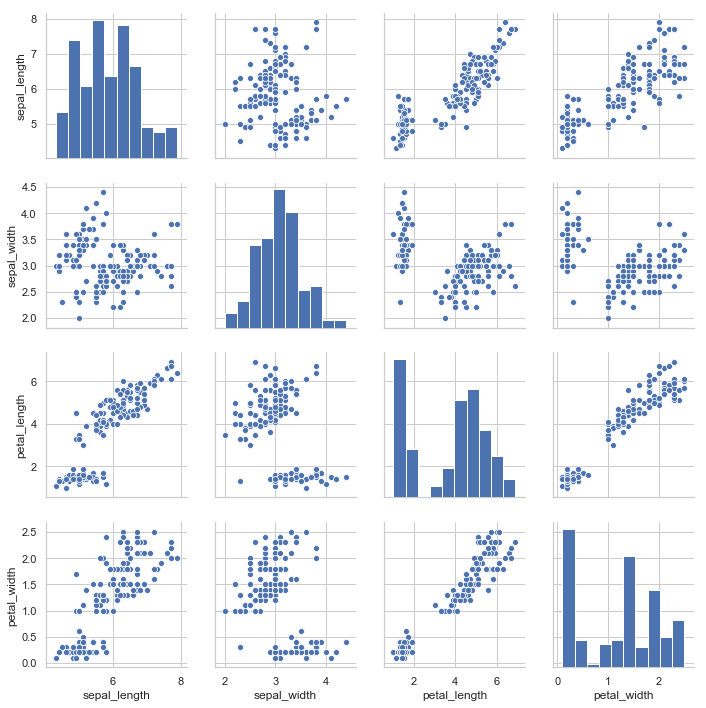

In [9]:
sns.pairplot(data = iris)

__注意__: __对角线__上是各个属性的直方图（分布图），而__非对角线__上是两个不同属性之间的相关图

```pairplot``` has the following parameters:
- `kind`：用于控制非对角线上的图的类型，可选"`scatter`"与"`reg`"
- `diag_kind`：控制对角线上的图的类型，可选"`hist`"与"`kde`"
- `hue`：针对某一字段进行分类
- `palette`：控制色调
- `markers`：控制散点的样式
- `vars`, `x_vars`, `y_vars`：选择数据中的特定字段，以list形式传入
- `plot_kws`：用于控制非对角线上的图的样式
- `diag_kws`：用于控制对角线上图的样式

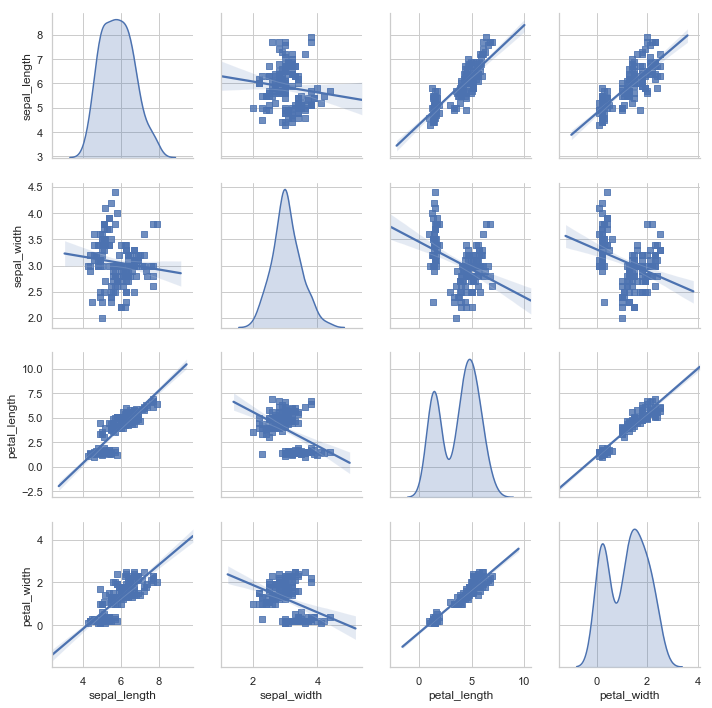

In [10]:
sns.pairplot(iris, kind = "reg", diag_kind = "kde", palette="husl", markers = ['s'],)

将 `kind` 参数设置为 "`reg`" 会为非对角线上的散点图拟合出一条回归直线，更直观地显示变量之间的关系

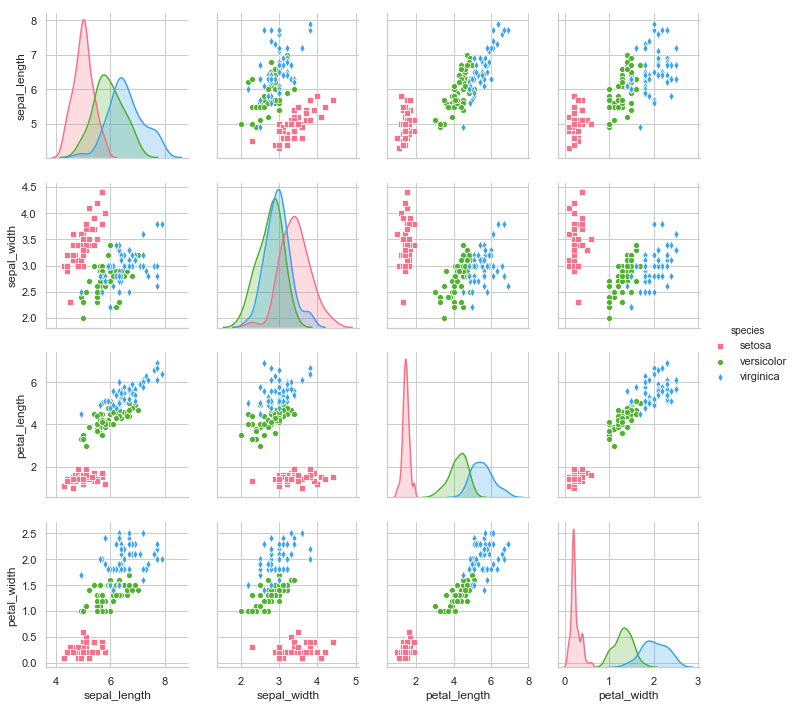

In [11]:
sns.pairplot(iris, hue = "species", palette="husl", markers = ['s', 'o', 'd'])

当我们想单独研究某两个（或多个）变量的关系时，我们只需要通过`vars`参数指定你想研究的变量, 比如：

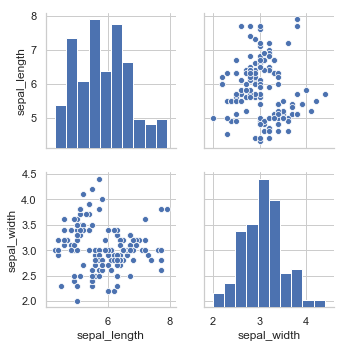

In [12]:
sns.pairplot(iris, vars=["sepal_length", "sepal_width"]) 

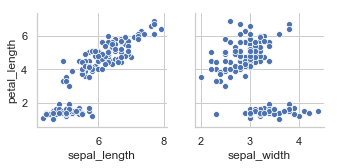

In [13]:
# 用x_vars和 y_vars参数指定
# 需要注意的是，x_vars和y_vars要同时指定, x_vars and y_vars can have different sizes
sns.pairplot(iris, x_vars=["sepal_length", "sepal_width"], y_vars=["petal_length"]) 

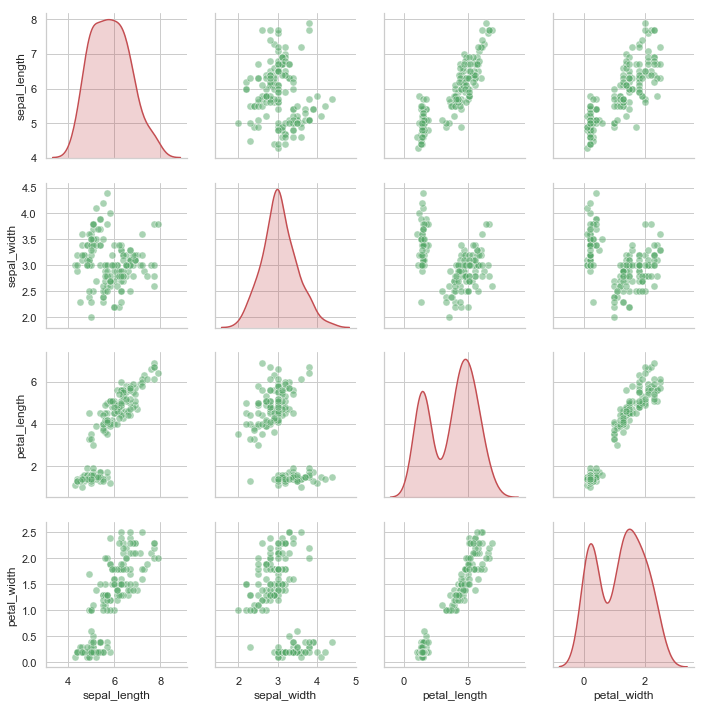

In [14]:
sns.pairplot(iris, diag_kind = 'kde',
             plot_kws=dict(s=50, edgecolor="w", color="g", alpha=.5),
             diag_kws=dict(shade=True, color="r"))

## 4. boxplot

箱形图（boxplot）又称为盒须图、盒式图或箱线图，是一种用作显示一组数据分散情况资料的统计图。它能显示出一组数据的最大值、最小值、中位数及上下四分位数。

```
seaborn.boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)
```

In [15]:
# load iris data 鸢尾花数据
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


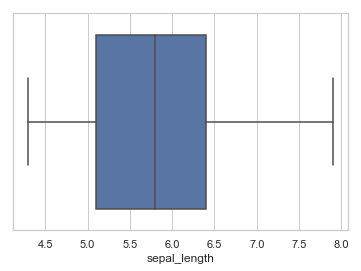

In [16]:
sns.boxplot(x = 'sepal_length', data = iris)

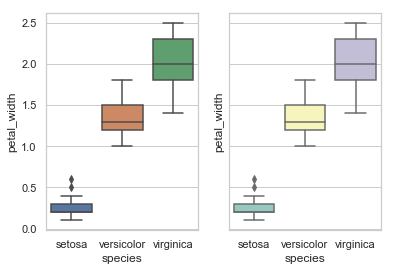

In [17]:
fig,axes = plt.subplots(1,2,sharey=True)
sns.boxplot(x="species", y="petal_width", data=iris, ax=axes[0]) #左图
sns.boxplot(x="species", y="petal_width", data=iris, palette="Set3", ax=axes[1]) # Use palette to change color

## 5. violinplot

`violinplot`与`boxplot`扮演类似的角色，它显示了定量数据在一个（或多个）分类变量的多个层次上的分布，这些分布可以进行比较。不像箱形图中所有绘图组件都对应于实际数据点，小提琴绘图以基础分布的核密度估计为特征。

```
seaborn.violinplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None, **kwargs)
```

In [18]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


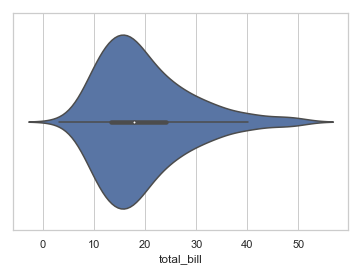

In [19]:
sns.violinplot(x=tips["total_bill"])

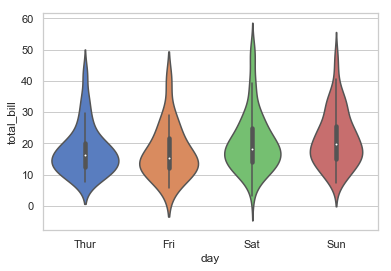

In [20]:
sns.violinplot(x="day", y="total_bill", data=tips, palette="muted")

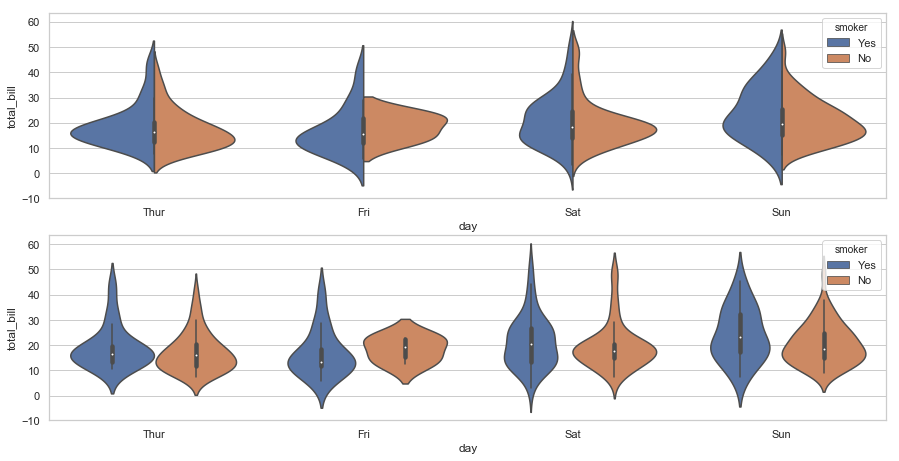

In [21]:
fig, axes = plt.subplots(2,1, figsize=(15,7.5))  
ax = sns.violinplot(x="day", y="total_bill", data=tips, hue="smoker", split=True, ax=axes[0]) #上图，拆分后的图
ax = sns.violinplot(x="day", y="total_bill", data=tips, hue="smoker", ax=axes[1])  #下图

`scale`：该参数用于缩放每把小提琴的宽度，有“`area`”, “`count`”, “`width`”三种方式

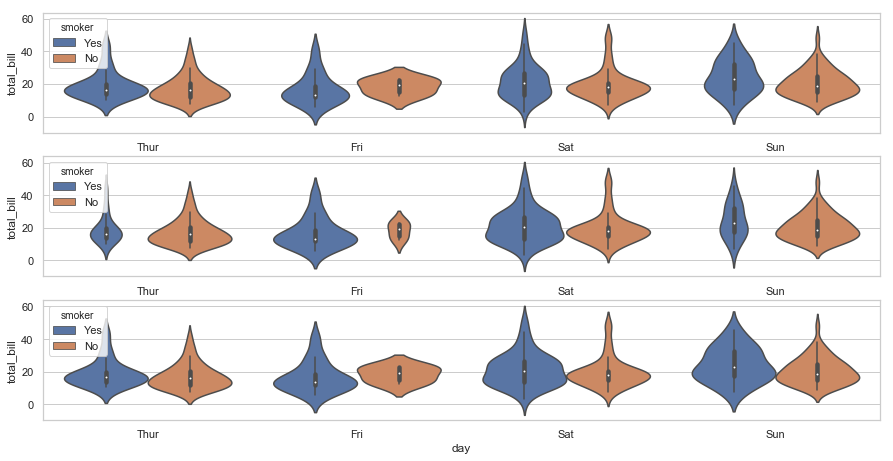

In [22]:
fig, axes = plt.subplots(3,1, figsize=(15,7.5))  
#如果为"area"，每把小提琴将有相同的面积(上图)
ax = sns.violinplot(x="day", y="total_bill", data=tips, hue="smoker", scale="area", ax=axes[0])
#如果为"count"，小提琴的宽度将根据该小组中观察的数量来缩放（中图）
ax = sns.violinplot(x="day", y="total_bill", data=tips, hue="smoker", scale="count", ax=axes[1])
#如果为"age"，每把小提琴将有相同的宽度（下图）
ax = sns.violinplot(x="day", y="total_bill", data=tips, hue="smoker", scale="width", ax=axes[2])

`inner`：控制violinplot内部数据点的表示，有“`box`”, “`quartile`”, “`point`”, “`stick`”四种方式。

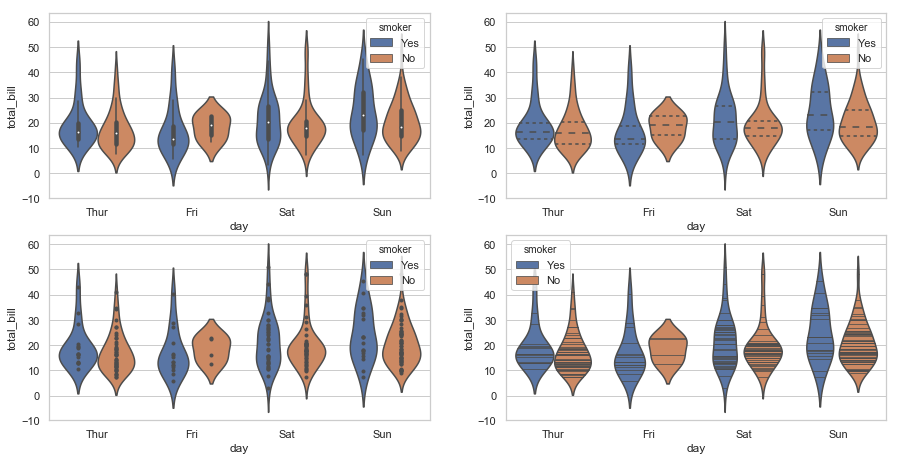

In [23]:
fig, axes = plt.subplots(2,2, figsize=(15,7.5))  
#钢琴图内显示箱型图（左上）
ax = sns.violinplot(x="day", y="total_bill", data=tips, hue="smoker", inner="box", ax=axes[0, 0])
#钢琴图内显示四分位数线（右上）
ax = sns.violinplot(x="day", y="total_bill", data=tips, hue="smoker", inner="quartile", ax=axes[0, 1])
#钢琴图内显示具体数据点（左下）
ax = sns.violinplot(x="day", y="total_bill", data=tips, hue="smoker", inner="point", ax=axes[1, 0])
#钢琴图内显示具体数据棒（右下）
ax = sns.violinplot(x="day", y="total_bill", data=tips, hue="smoker", inner="stick", ax=axes[1, 1])

## 6. lmplot

`lmplot`是用来绘制回归图的，通过`lmplot`我们可以直观地总览数据的内在关系。

```
seaborn.lmplot(x, y, data, hue=None, col=None, row=None, palette=None, col_wrap=None, height=5, aspect=1, markers='o', sharex=True, sharey=True, hue_order=None, col_order=None, row_order=None, legend=True, legend_out=True, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None, size=None)
```

In [24]:
sns.set(font_scale=1.5, style="white", color_codes=True)

In [25]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


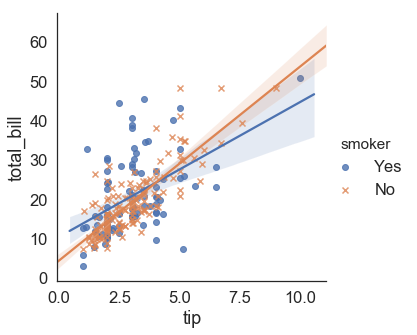

In [26]:
sns.lmplot(x='tip', y='total_bill', hue="smoker", data=tips, markers=["o", "x"])

`col`: 根据所指定属性在列上分类

`row`: 根据所指定属性在行上分类

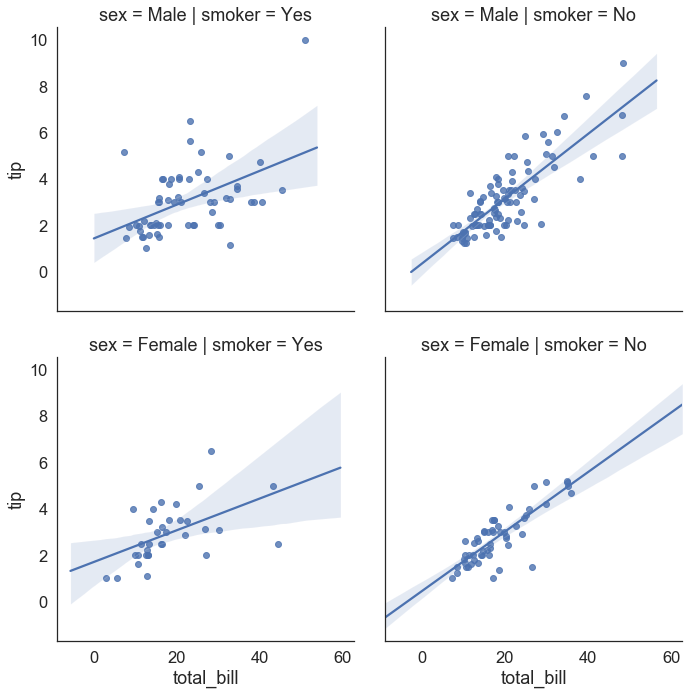

In [27]:
sns.lmplot(x="total_bill", y="tip", data=tips, row="sex", col="smoker")

`order`: 控制进行回归的幂次（一次以上即是多项式回归）

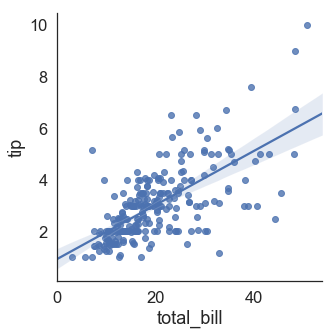

In [28]:
sns.lmplot(x="total_bill", y="tip", data=tips, order=1) # linear regression

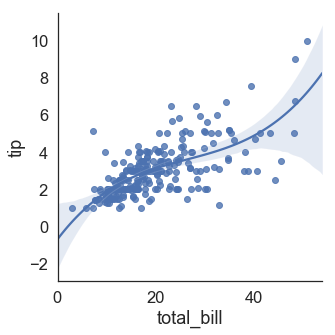

In [29]:
sns.lmplot(x="total_bill", y="tip", data=tips, order=3) # cubic regression

## 7. relplot

`relplot` is very similar to `lmplot`.

## 8. scatterplot

The usage of `scatterplot` is similar to `relplot`

In [30]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


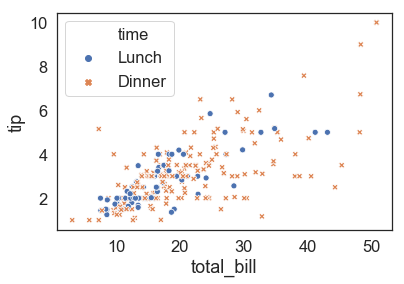

In [31]:
ax = sns.scatterplot(x="total_bill", y="tip", hue="time", style="time", data=tips)

## 9. distplot

`distplot` 可以用来查看<span style="color:red">**单变量**</span>的分布。默认情况下，将绘制直方图并拟合核密度估计（KDE, kernel density estimate）。`distplot`可以理解为`histplot`, `kdeplot` 和 `rugplot`的集合。以下的参数列表中可以控制是否显示其中的一个。

```
seaborn.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
```

In [32]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


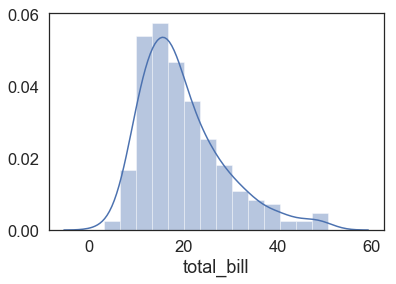

In [33]:
sns.distplot(tips['total_bill'])

直方图将数据分成bin(s)，然后绘制条形以显示落在每个bin中的数据数量，来表示数据的分布。

为了说明这一点，可以删除密度曲线并添加一个地毯图，该图在每次观察时都会绘制一个小的垂直刻度。 可以使用`rugplot()`函数制作地毯图，也可以在`distplot()`中使用它。

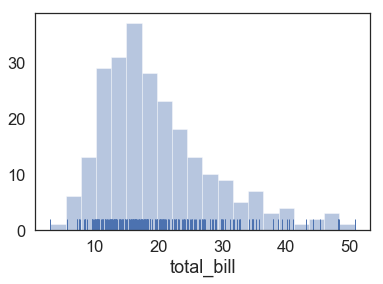

In [34]:
sns.distplot(tips['total_bill'], bins=20, rug=True, kde=False)

## 10. joinplot

`joinplot`用于<span style="color:red">**双变量**</span>的可视化。

```
seaborn.jointplot(x, y, data=None, kind='scatter', stat_func=None, color=None, height=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)
```
以下是常用的参数
- `kind`: "scatter" | "reg" | "resid" | "kde" | "hex"

In [35]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


可视化双变量分布的最常用的方法是散点图，和`matplotlib plt.scatter`类似。

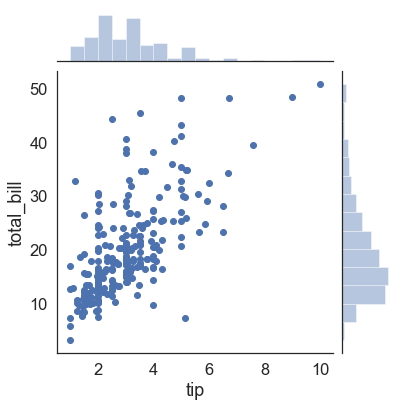

In [36]:
sns.jointplot(x="tip", y="total_bill", data=tips)

核密度估计

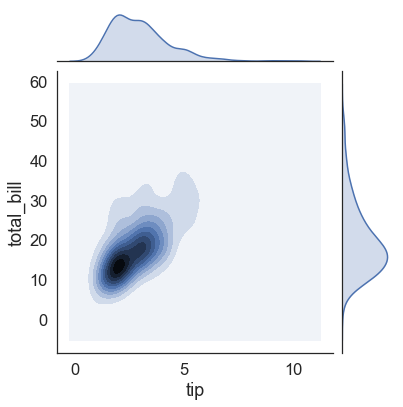

In [37]:
sns.jointplot(x="tip", y="total_bill", kind='kde', data=tips)

`jointplot()`函数使用`JointGrid`来管理图形，您可以直接使用`JointGrid`绘制图形。`jointplot()`在绘制后返回`JointGrid`对象，你可以使用该对象添加更多层或调整可视化的其他属性。

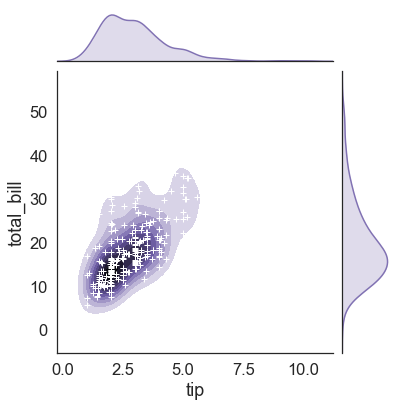

In [38]:
g = sns.jointplot(x="tip", y="total_bill", kind='kde', data=tips, color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("tip", "total_bill")